## MULTI LINEAR REGRESSION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import statsmodels.formula.api as smf
import pylab
import scipy.stats as st
from sklearn.model_selection import train_test_split

In [2]:
toyota=pd.read_excel("C:/Users/HARSHA/Downloads/TOYOTA.xlsx")
toyota

,Id,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,1,13500,23,46986,90,2000,3,5,210,1165
1,2,13750,23,72937,90,2000,3,5,210,1165
2,3,13950,24,41711,90,2000,3,5,210,1165
3,4,14950,26,48000,90,2000,3,5,210,1165
4,5,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1431,1438,7500,69,20544,86,1300,3,5,69,1025
1432,1439,10845,72,19000,86,1300,3,5,69,1015
1433,1440,8500,71,17016,86,1300,3,5,69,1015
1434,1441,7250,70,16916,86,1300,3,5,69,1015


In [3]:
toyota.describe()

,Id,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,721.555014,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,416.476890,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,1.000000,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,361.750000,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,721.500000,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,1081.250000,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,1442.000000,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


{'whiskers': [<matplotlib.lines.Line2D at 0x21072c69a90>,
 'caps': [<matplotlib.lines.Line2D at 0x21072c22190>,
 'boxes': [<matplotlib.lines.Line2D at 0x21072c69730>],
 'medians': [<matplotlib.lines.Line2D at 0x21072c22850>],
 'fliers': [<matplotlib.lines.Line2D at 0x21072c22bb0>],
 'means': []}

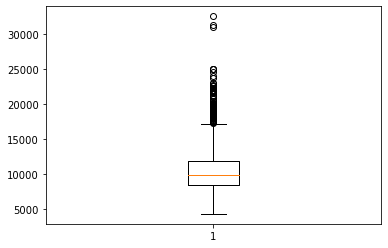

In [4]:
plt.boxplot(toyota["Price"])

{'whiskers': [<matplotlib.lines.Line2D at 0x21072f9d910>,
 'caps': [<matplotlib.lines.Line2D at 0x21072f9dfd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21072f9d5b0>],
 'medians': [<matplotlib.lines.Line2D at 0x21072fa86d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x21072fa8a30>],
 'means': []}

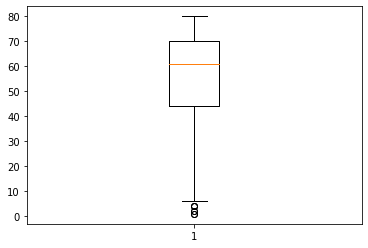

In [5]:
plt.boxplot(toyota["Age"])

{'whiskers': [<matplotlib.lines.Line2D at 0x210730046a0>,
 'caps': [<matplotlib.lines.Line2D at 0x21073004d60>,
 'boxes': [<matplotlib.lines.Line2D at 0x21073004310>],
 'medians': [<matplotlib.lines.Line2D at 0x2107300f460>],
 'fliers': [<matplotlib.lines.Line2D at 0x2107300f7c0>],
 'means': []}

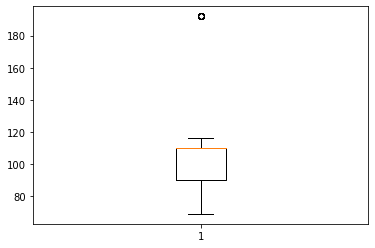

In [6]:
plt.boxplot(toyota["HP"])

{'whiskers': [<matplotlib.lines.Line2D at 0x21073067220>,
 'caps': [<matplotlib.lines.Line2D at 0x210730678e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21073059e80>],
 'medians': [<matplotlib.lines.Line2D at 0x21073067fa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x21073073340>],
 'means': []}

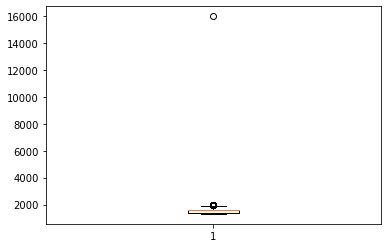

In [7]:
plt.boxplot(toyota["cc"])

{'whiskers': [<matplotlib.lines.Line2D at 0x210730c8370>,
 'caps': [<matplotlib.lines.Line2D at 0x210730c8a30>,
 'boxes': [<matplotlib.lines.Line2D at 0x210730bafd0>],
 'medians': [<matplotlib.lines.Line2D at 0x210730d3130>],
 'fliers': [<matplotlib.lines.Line2D at 0x210730d3490>],
 'means': []}

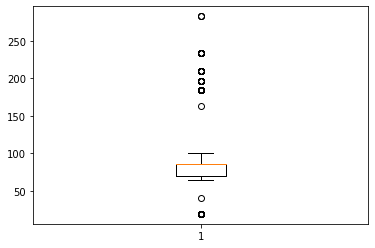

In [8]:
plt.boxplot(toyota["Quarterly_Tax"])

{'whiskers': [<matplotlib.lines.Line2D at 0x2107311df70>,
 'caps': [<matplotlib.lines.Line2D at 0x2107312d670>,
 'boxes': [<matplotlib.lines.Line2D at 0x2107311dbe0>],
 'medians': [<matplotlib.lines.Line2D at 0x2107312dd30>],
 'fliers': [<matplotlib.lines.Line2D at 0x210731380d0>],
 'means': []}

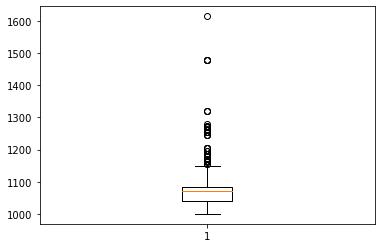

In [9]:
plt.boxplot(toyota["Weight"])

In [10]:
toyota.corr()

,Id,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Id,1.000000,-0.738250,0.906132,0.273298,-0.109375,-0.117704,-0.130207,-0.043343,-0.240821,-0.414500
Price,-0.738250,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age,0.906132,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,0.273298,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,-0.109375,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,-0.117704,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,-0.130207,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,-0.043343,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,-0.240821,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,-0.414500,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


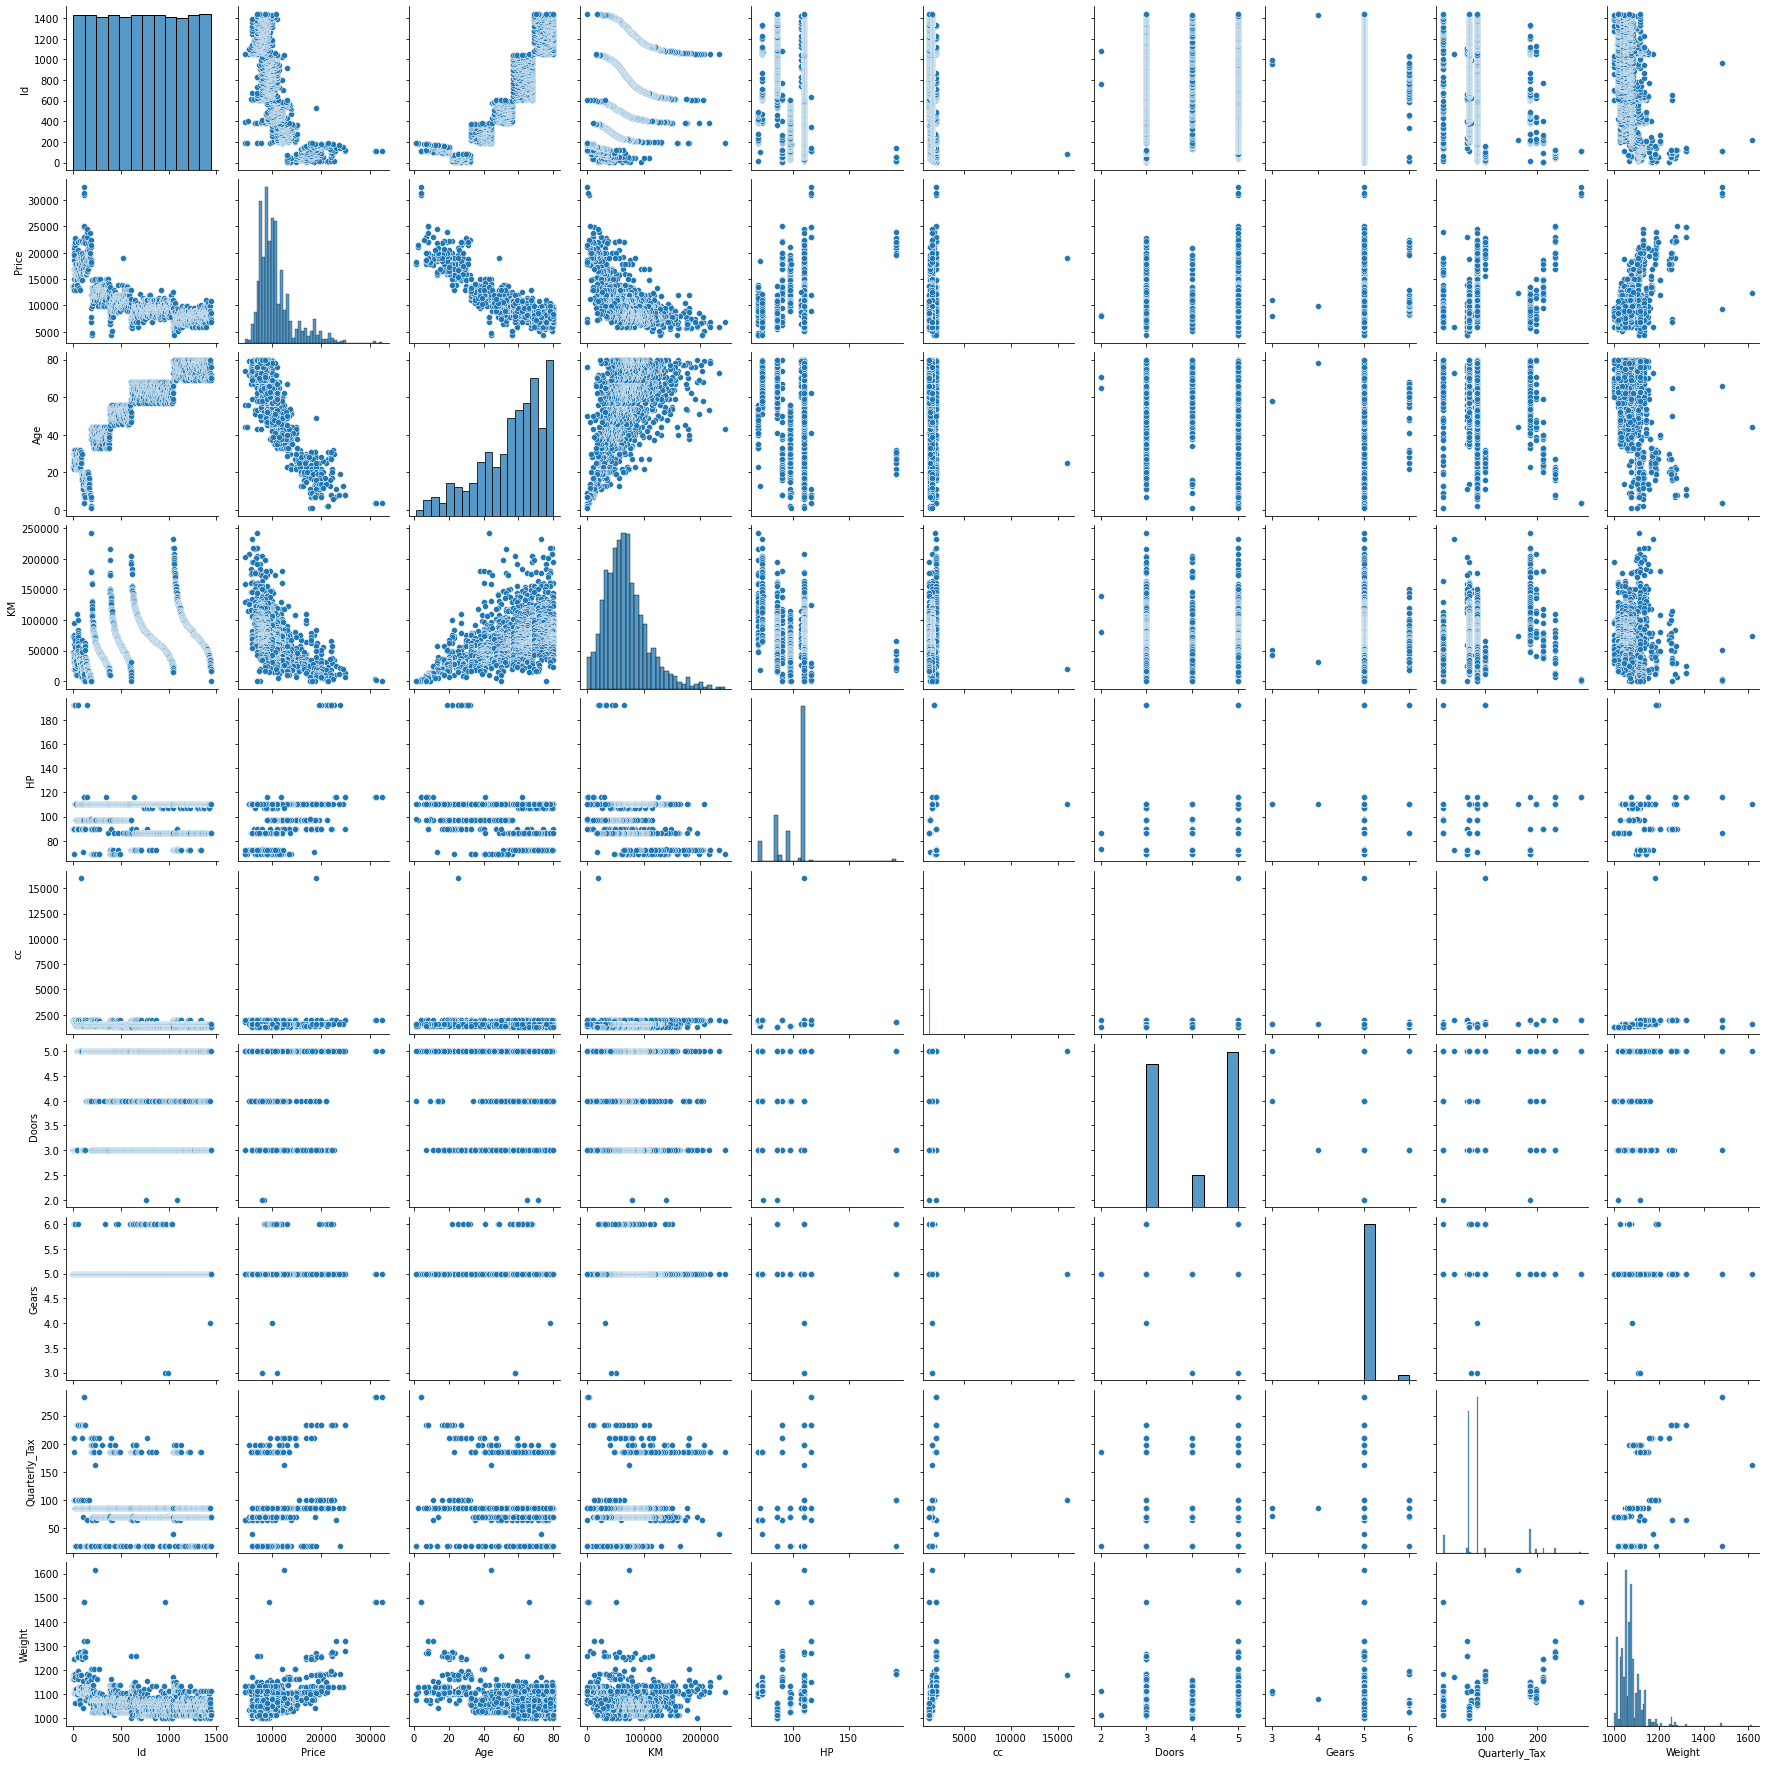

In [11]:
sns.pairplot(toyota)
correlation_values= toyota.corr()

In [12]:
model1= smf.ols("Price~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data= toyota).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Sun, 06 Jun 2021   Prob (F-statistic):               0.00
Time:                        17:58:51   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age            -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
model1_cc = smf.ols("Price~cc",data= toyota).fit()
model1_cc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     23.28
Date:                Sun, 06 Jun 2021   Prob (F-statistic):           1.55e-06
Time:                        17:58:52   Log-Likelihood:                -13795.
No. Observations:                1436   AIC:                         2.759e+04
Df Residuals:                    1434   BIC:                         2.760e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9027.5548    365.576     24.694      0.000    8310.435    9744.675
cc             1.0802      0.224      4.825      0.000       0.641       1.519
==============================================================================
Omnibus:                      465.181   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1390.401
Skew:                           1.649   Prob(JB):                    1.20e-302
Kurtosis:                       6.516   Cond. No.                     6.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
model1_cc = smf.ols("Price~Doors",data= toyota).fit()
model1_cc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     51.00
Date:                Sun, 06 Jun 2021   Prob (F-statistic):           1.46e-12
Time:                        17:58:52   Log-Likelihood:                -13782.
No. Observations:                1436   AIC:                         2.757e+04
Df Residuals:                    1434   BIC:                         2.758e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7885.0058    409.438     19.258      0.000    7081.843    8688.168
Doors        705.5586     98.795      7.142      0.000     511.761     899.356
==============================================================================
Omnibus:                      466.779   Durbin-Watson:                   0.287
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1406.209
Skew:                           1.651   Prob(JB):                    4.42e-306
Kurtosis:                       6.549   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
model1_cc = smf.ols("Price~cc+Doors",data= toyota).fit()
model1_cc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     35.24
Date:                Sun, 06 Jun 2021   Prob (F-statistic):           1.15e-15
Time:                        17:58:52   Log-Likelihood:                -13772.
No. Observations:                1436   AIC:                         2.755e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6509.4211    515.773     12.621      0.000    5497.670    7521.173
cc             0.9597      0.221      4.340      0.000       0.526       1.393
Doors        671.3973     98.501      6.816      0.000     478.176     864.619
==============================================================================
Omnibus:                      448.845   Durbin-Watson:                   0.290
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1294.854
Skew:                           1.603   Prob(JB):                    6.70e-282
Kurtosis:                       6.370   Cond. No.                     9.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
toyota1= toyota.drop(toyota.index[[80]],axis=0) ##removing 80 and checking for significance

In [17]:
model2= smf.ols("Price~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data= toyota1).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1186.
Date:                Sun, 06 Jun 2021   Prob (F-statistic):               0.00
Time:                        17:58:52   Log-Likelihood:                -12335.
No. Observations:                1435   AIC:                         2.469e+04
Df Residuals:                    1426   BIC:                         2.473e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6284.7401   1382.748     -4.545      0.000   -8997.180   -3572.301
Age            -120.4550      2.562    -47.021      0.000    -125.480    -115.430
KM               -0.0178      0.001    -13.973      0.000      -0.020      -0.015
HP               39.3463      2.911     13.516      0.000      33.636      45.057
cc               -2.5242      0.307     -8.216      0.000      -3.127      -1.922
Doors           -27.2285     39.241     -0.694      0.488    -104.206      49.749
Gears           523.9416    192.865      2.717      0.007     145.612     902.271
Quarterly_Tax     9.0440      1.425      6.348      0.000       6.249      11.839
Weight           20.1655      1.116     18.076      0.000      17.977      22.354
==============================================================================
Omnibus:                      246.945   Durbin-Watson:                   1.595
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2706.374
Skew:                          -0.443   Prob(JB):                         0.00
Kurtosis:                       9.669   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
toyota2 = toyota.drop(toyota.index[[80,221]],axis=0) ##removing 80 and 221, where 221 is the next most influencing index

In [19]:
model3= smf.ols("Price~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data= toyota2).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     1280.
Date:                Sun, 06 Jun 2021   Prob (F-statistic):               0.00
Time:                        17:58:52   Log-Likelihood:                -12278.
No. Observations:                1434   AIC:                         2.457e+04
Df Residuals:                    1425   BIC:                         2.462e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.025e+04   1395.733     -7.346      0.000    -1.3e+04   -7514.512
Age            -116.5783      2.508    -46.475      0.000    -121.499    -111.658
KM               -0.0173      0.001    -13.966      0.000      -0.020      -0.015
HP               39.2932      2.816     13.953      0.000      33.769      44.817
cc               -3.2057      0.305    -10.511      0.000      -3.804      -2.607
Doors           -65.3718     38.152     -1.713      0.087    -140.212       9.468
Gears           485.0462    186.602      2.599      0.009     119.001     851.091
Quarterly_Tax     7.9664      1.382      5.762      0.000       5.254      10.678
Weight           25.0494      1.186     21.129      0.000      22.724      27.375
==============================================================================
Omnibus:                      197.976   Durbin-Watson:                   1.638
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1765.342
Skew:                          -0.317   Prob(JB):                         0.00
Kurtosis:                       8.399   Cond. No.                     3.27e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
toyota3= toyota.drop(toyota.index[[80,221,960]],axis=0)

In [21]:
model4= smf.ols("Price~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight", data = toyota3).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     1372.
Date:                Sun, 06 Jun 2021   Prob (F-statistic):               0.00
Time:                        17:58:52   Log-Likelihood:                -12226.
No. Observations:                1433   AIC:                         2.447e+04
Df Residuals:                    1424   BIC:                         2.452e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.474e+04   1432.942    -10.289      0.000   -1.76e+04   -1.19e+04
Age            -112.0180      2.479    -45.185      0.000    -116.881    -107.155
KM               -0.0170      0.001    -14.160      0.000      -0.019      -0.015
HP               36.6084      2.745     13.334      0.000      31.223      41.994
cc               -3.7954      0.302    -12.562      0.000      -4.388      -3.203
Doors          -122.5437     37.480     -3.270      0.001    -196.067     -49.021
Gears           464.9839    180.976      2.569      0.010     109.975     819.993
Quarterly_Tax     5.2134      1.371      3.802      0.000       2.523       7.904
Weight           30.6398      1.290     23.748      0.000      28.109      33.171
==============================================================================
Omnibus:                      121.821   Durbin-Watson:                   1.701
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              704.567
Skew:                          -0.082   Prob(JB):                    1.01e-153
Kurtosis:                       6.431   Cond. No.                     3.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
MODEL_FINAL = smf.ols("Price~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight", data = toyota3).fit()
MODEL_FINAL.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     1372.
Date:                Sun, 06 Jun 2021   Prob (F-statistic):               0.00
Time:                        17:58:52   Log-Likelihood:                -12226.
No. Observations:                1433   AIC:                         2.447e+04
Df Residuals:                    1424   BIC:                         2.452e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.474e+04   1432.942    -10.289      0.000   -1.76e+04   -1.19e+04
Age            -112.0180      2.479    -45.185      0.000    -116.881    -107.155
KM               -0.0170      0.001    -14.160      0.000      -0.019      -0.015
HP               36.6084      2.745     13.334      0.000      31.223      41.994
cc               -3.7954      0.302    -12.562      0.000      -4.388      -3.203
Doors          -122.5437     37.480     -3.270      0.001    -196.067     -49.021
Gears           464.9839    180.976      2.569      0.010     109.975     819.993
Quarterly_Tax     5.2134      1.371      3.802      0.000       2.523       7.904
Weight           30.6398      1.290     23.748      0.000      28.109      33.171
==============================================================================
Omnibus:                      121.821   Durbin-Watson:                   1.701
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              704.567
Skew:                          -0.082   Prob(JB):                    1.01e-153
Kurtosis:                       6.431   Cond. No.                     3.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
MODEL_FINAL_pred = MODEL_FINAL.predict(toyota3)

Text(0, 0.5, 'Predicted values')

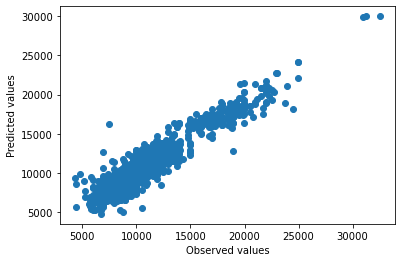

In [24]:
plt.scatter(toyota3["Price"],MODEL_FINAL_pred);
plt.xlabel("Observed values");plt.ylabel("Predicted values")

Text(0, 0.5, 'Residuals')

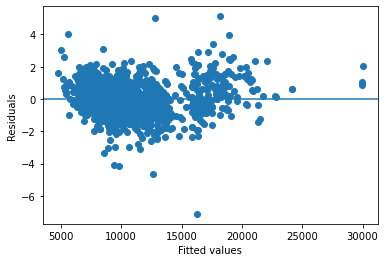

In [25]:
plt.scatter(MODEL_FINAL_pred, MODEL_FINAL.resid_pearson);
plt.axhline(y=0);
plt.xlabel("Fitted values");plt.ylabel("Residuals")

((array([-3.29990572, -3.0423199 , -2.89905096, ...,  2.89905096,
          3.0423199 ,  3.29990572]),
  array([-7.11152315, -4.61523681, -4.13985897, ...,  4.01261664,
          5.00012015,  5.12173363])),
 (0.9842286314351268, -3.1406323962851847e-12, 0.9853340591988012))

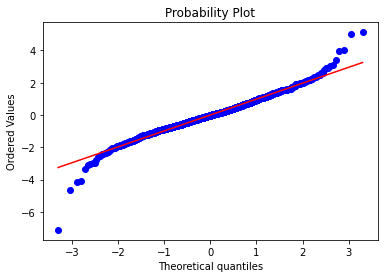

In [26]:
st.probplot(MODEL_FINAL.resid_pearson, dist='norm',plot=pylab)

In [27]:
train_data,test_Data= train_test_split(toyota,test_size=0.3)

In [28]:
MODEL_FINAL1 = smf.ols("Price~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight", data = train_data).fit()
MODEL_FINAL1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     759.2
Date:                Sun, 06 Jun 2021   Prob (F-statistic):               0.00
Time:                        17:58:53   Log-Likelihood:                -8674.4
No. Observations:                1005   AIC:                         1.737e+04
Df Residuals:                     996   BIC:                         1.741e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3523.6563   1639.669     -2.149      0.032   -6741.258    -306.055
Age            -121.5168      3.122    -38.924      0.000    -127.643    -115.390
KM               -0.0213      0.002    -13.750      0.000      -0.024      -0.018
HP               36.1759      3.398     10.648      0.000      29.509      42.843
cc               -0.0475      0.092     -0.514      0.608      -0.229       0.134
Doors           -14.2101     48.194     -0.295      0.768    -108.784      80.363
Gears           378.1334    239.655      1.578      0.115     -92.153     848.420
Quarterly_Tax     6.0657      1.568      3.868      0.000       2.989       9.143
Weight           15.4030      1.195     12.890      0.000      13.058      17.748
==============================================================================
Omnibus:                      103.083   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              665.378
Skew:                          -0.177   Prob(JB):                    3.27e-145
Kurtosis:                       6.970   Cond. No.                     2.96e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.96e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
MODEL_FINAL_pred = MODEL_FINAL1.predict(train_data)
MODEL_FINAL_pred

1211     5854.933480
1232     8797.228043
515     10802.090723
1054     5571.186278
1058     5640.967152
            ...     
124     17288.732829
403     10333.327382
1217     7655.219157
182     19103.669769
1396     8598.165817
Length: 1005, dtype: float64

In [30]:
MODEL_FINAL_res = train_data["Price"]-MODEL_FINAL_pred
MODEL_FINAL_res

1211    2395.066520
1232   -1297.228043
515      -52.090723
1054    3178.813722
1058    4859.032848
           ...     
124     -338.732829
403      616.672618
1217     594.780843
182     2021.330231
1396    1201.834183
Length: 1005, dtype: float64

In [31]:
MODEL_FINAL_rmse = np.sqrt(np.mean(MODEL_FINAL_res*MODEL_FINAL_res))
MODEL_FINAL_rmse

1356.0568094188072

In [32]:
MODEL_FINAL_testpred = MODEL_FINAL1.predict(test_Data)
MODEL_FINAL_testpred

785     10066.552239
772     10477.136001
1028     9651.829476
62      15576.184786
322     13609.572045
            ...     
436     13243.566302
1347     8759.982400
1334     9207.462787
637      8181.129238
216     13252.951072
Length: 431, dtype: float64

In [33]:
MODEL_FINAL_testres= test_Data["Price"]-MODEL_FINAL_testpred
MODEL_FINAL_testres

785    -1116.552239
772     -977.136001
1028    1098.170524
62      3173.815214
322      340.427955
           ...     
436    -1743.566302
1347   -1309.982400
1334   -2208.462787
637     -186.129238
216      247.048928
Length: 431, dtype: float64

In [34]:
MODEL_FINAL_testrmse = np.sqrt(np.mean(MODEL_FINAL_testres*MODEL_FINAL_testres))
MODEL_FINAL_testrmse

1305.8351172330624

In [35]:
#TRAIN_RMSE is 1337.6240400077306 , TEST_RMSE is 1346.4190494214374.

In [36]:
data= pd.DataFrame({"MODEL_FINAL_testrmse"})